In [453]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [454]:
# Step 1: Data Loading and Inspection

file_path = 'vgsales.csv'
df = pd.read_csv(file_path)

# Displays basic information about the dataset
print("Number of rows and columns:", df.shape)
print("\nData types and missing values:")
print(df.info())
print(df.describe())

# Checks for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Drops rows with missing values
df = df.dropna()

Number of rows and columns: (16598, 11)

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None
               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443  

In [455]:
# Step 2: Data Cleaning

# Drops duplicates
df = df.drop_duplicates()

# Converts columns with decimals to whole numbers
df['NA_Sales'] = df['NA_Sales'].astype(int)
df['EU_Sales'] = df['EU_Sales'].astype(int)
df['JP_Sales'] = df['JP_Sales'].astype(int)
df['Other_Sales'] = df['Other_Sales'].astype(int)
df['Global_Sales'] = df['Global_Sales'].astype(int)
df['Year'] = df['Year'].astype(int)

# Drops rows where the values are 0 in the 'Example_Column'
df = df[df['NA_Sales'] != 0]
df = df[df['EU_Sales'] != 0]
df = df[df['JP_Sales'] != 0]
df = df[df['Other_Sales'] != 0]
df = df[df['Global_Sales'] != 0]


Descriptive Statistics:
            Rank         Year   NA_Sales   EU_Sales   JP_Sales  Other_Sales  \
count  16.000000    16.000000  16.000000  16.000000  16.000000    16.000000   
mean   14.187500  2005.687500  11.312500   9.000000   3.687500     2.000000   
std    10.882517     3.300884   8.784219   5.966574   2.272114     1.712698   
min     1.000000  1996.000000   3.000000   2.000000   1.000000     1.000000   
25%     6.500000  2005.000000   6.000000   6.500000   2.000000     1.000000   
50%    11.500000  2006.000000   9.000000   8.000000   3.000000     2.000000   
75%    20.250000  2008.000000  14.000000   9.500000   4.250000     2.000000   
max    40.000000  2009.000000  41.000000  29.000000  10.000000     8.000000   

       Global_Sales  Original_Year  
count     16.000000      16.000000  
mean      27.437500    2005.687500  
std       16.053946       3.300884  
min       13.000000    1996.000000  
25%       19.500000    2005.000000  
50%       23.500000    2006.000000  
75% 

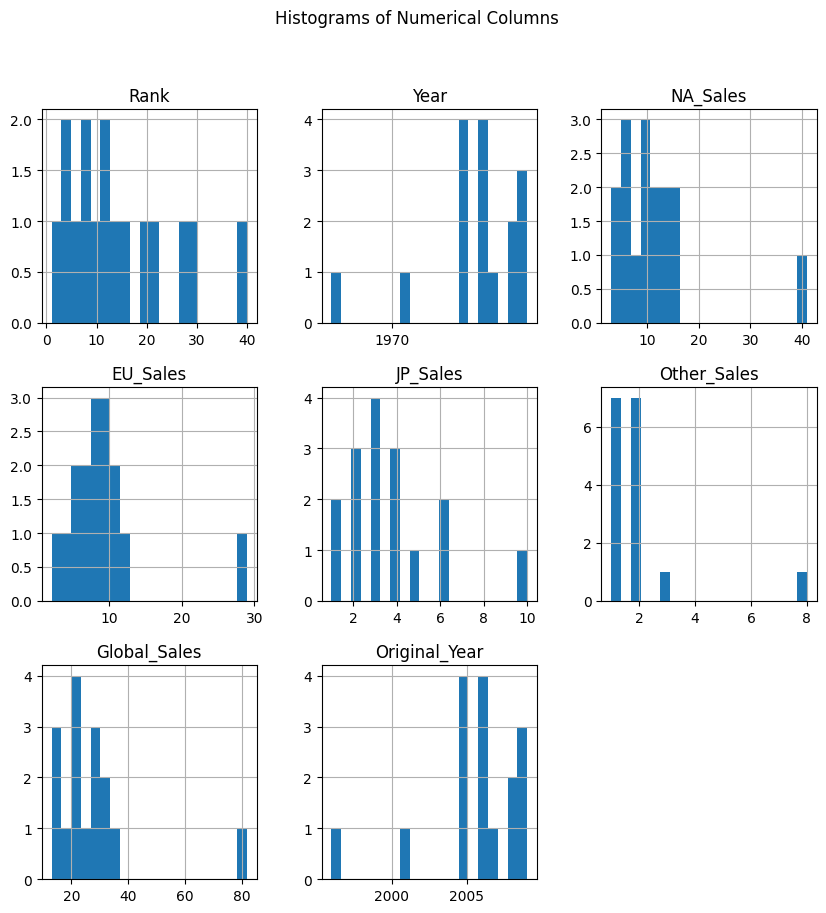

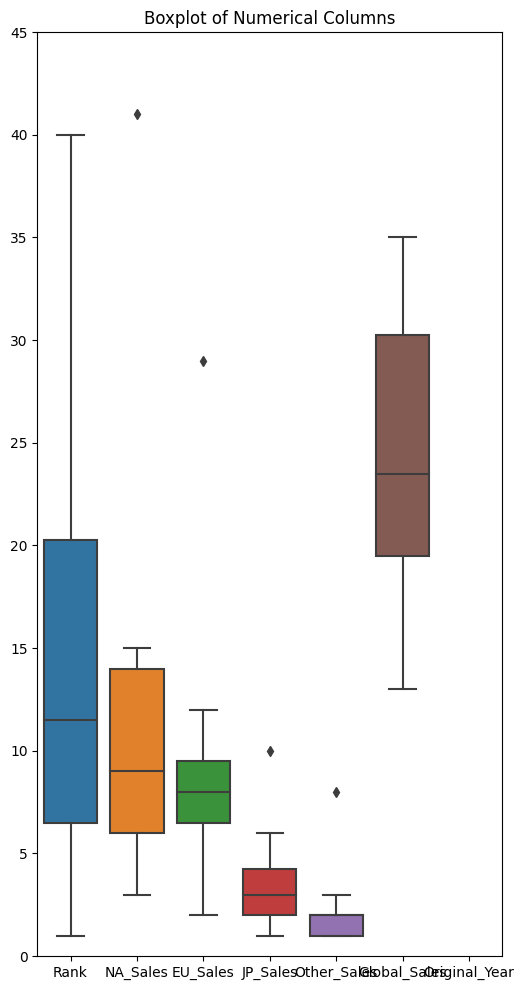

In [456]:
# Step 3: Descriptive Statistics

df['Original_Year'] = df['Year'].copy()
descriptive_stats = df.describe()
print("\nDescriptive Statistics:")
print(descriptive_stats)

# Explores the distribution of data and number quanities using histograms and box plots
df['Year'] = pd.to_datetime(df['Year'], errors='coerce')
df.hist(bins=20, figsize=(10, 10))
plt.suptitle("Histograms of Numerical Columns")
plt.show()

plt.figure(figsize=(6, 12))
sns.boxplot(data=df)
plt.ylim(0, 45)
plt.title("Boxplot of Numerical Columns")
plt.show()

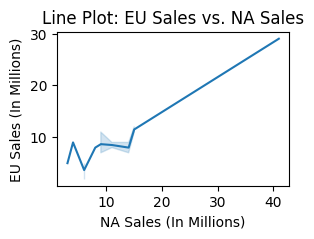

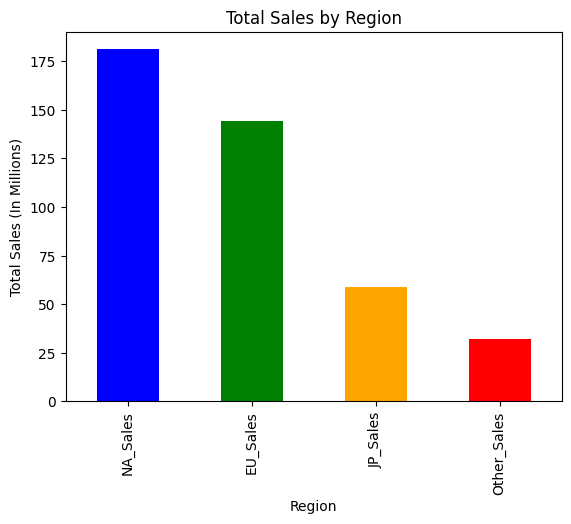

In [457]:
# Step 4: Data Visualization

# Scatter plot visualization of Global Sales vs. Other Sales to explore relationships between them
plt.figure(figsize=(3, 2))
sns.lineplot(x='NA_Sales', y='EU_Sales', data=df)
plt.title("Line Plot: EU Sales vs. NA Sales")
plt.xlabel("NA Sales (In Millions)")
plt.ylabel("EU Sales (In Millions)")
plt.show()

# Bar chart visualization of Sales across regions
sales_by_region = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
sales_by_region.plot(kind='bar', color=['blue', 'green', 'orange', 'red'])
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales (In Millions)")
plt.show()

<ipython-input-458-d822020f2bce>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


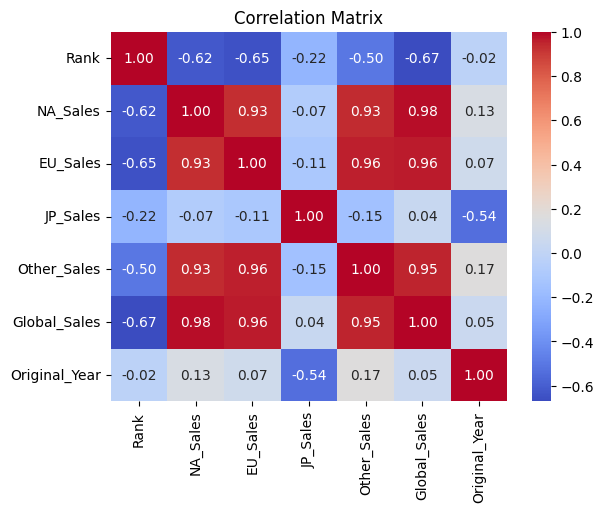

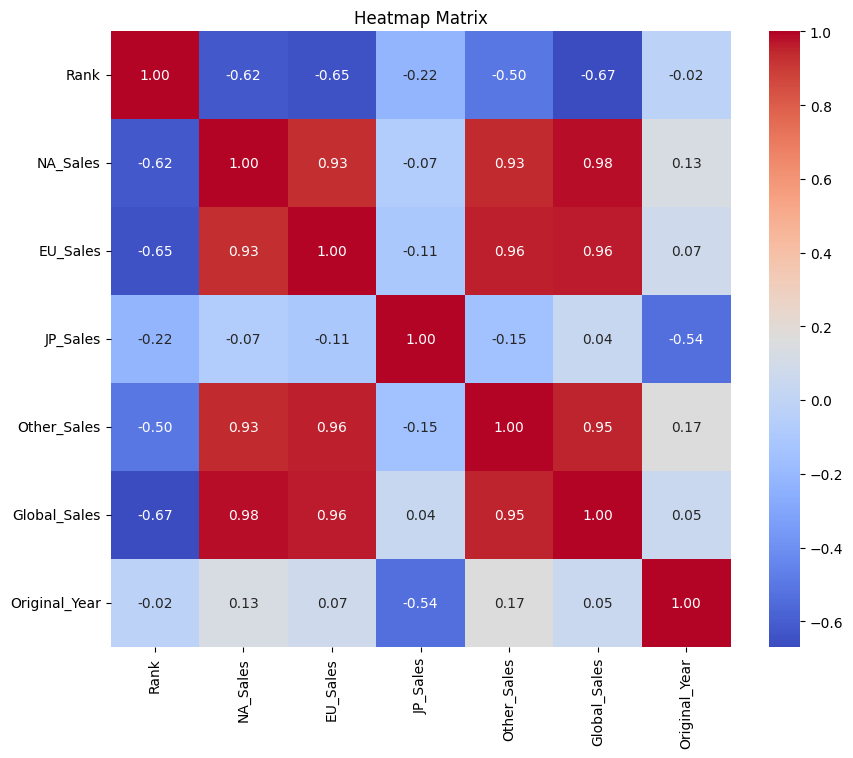

In [458]:
# Step 5: Correlation Analysis

# This ranks the comparison of number quantities between each of the columns
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Matrix")
plt.show()

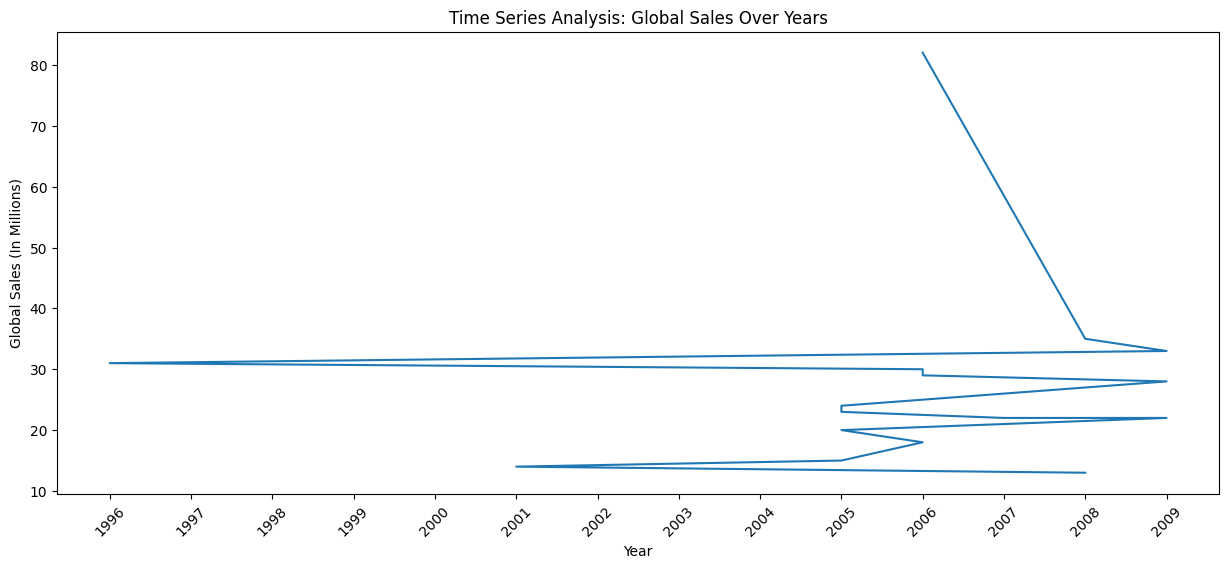

In [459]:
# Step 6: Time Series Analysis:

# Original_Year Fills in it's values into Year, making the Year column have it's original values again
df['Year'] = df['Original_Year'].fillna(df['Year'])
plt.figure(figsize=(15, 6))

# Time series analysis without setting 'Year' as the index
plt.plot(df['Year'], df['Global_Sales'])

# Set x-axis ticks from the minimum to maximum year with a step of 1
plt.xticks(range(int(df['Year'].min()), int(df['Year'].max()) + 1), rotation=45)

plt.title("Time Series Analysis: Global Sales Over Years")
plt.xlabel("Year")
plt.ylabel("Global Sales (In Millions)")

plt.show()

In [460]:
# Steps 7: Conclusion and Insights:

# Conclusion and Insights

# The dataset was successfully loaded and cleaned, removing missing values and converting decimals to integers in every column.
# Statistics visualizations on histograms and line graphs provided insights into the distribution of numerical columns.
# The correlation analysis highlighted relationships between different variables quantities in each column.
# The time series analysis only reveals global sales from the year 1996 to 2009.

# Challenges and Solutions

# One challenge was handling missing values, which were addressed by dropping rows with missing values.
# The dataset contained duplicates, which were removed to ensure the accuracy of the analysis.
# The time-series graph made it difficult to plot the x-axis year variables in order to line up with the global sales
# So I had to create a new column that holds the original year values before converting it to datetime which would make it
# difficult to graph the time-series

# Recommendations

# Condense the sales columns into two separate columns with Global Sales focusing on the US and National Sales focusing on other countries
# Don't make all the sales decimal-placed values, find a way to round them up to the number that is one plus more of it's rounded int
# Do not have any of the game rows have missing 0 values in each column they cross over because that will make the game not have
# a way to be compared in that sale column in which they don't have a number

In [461]:
# Saves the cleaned dataset
df.drop(columns=['Original_Year'], inplace=True)
df.to_csv("cleaned_vgsales.csv")